# Introduction

In this notebook I will try to give you an intuition what image filters do.

# Check dependencies

In the following some libraries are needed:

In [6]:
import cv2
print(cv2.__version__)

import matplotlib
print(matplotlib.__version__)

4.2.0
3.1.3


# Load test image and convert it to grayscale

In [7]:
fname = "../pics/on_the_highway_a7.png"
img = cv2.imread(fname)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(836, 1493)

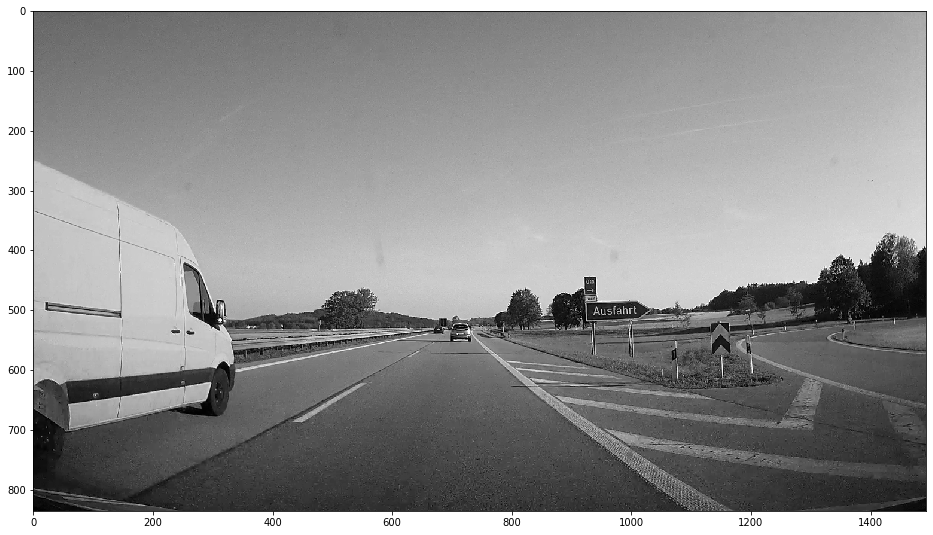

In [8]:
import matplotlib.pyplot as plt

pixel_size_in_inch = 0.02
fig_height_inch = int(img_gray.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(img_gray.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(img_gray, cmap="gray")

# Define a filter kernel

In [9]:
import numpy as np
F = np.array( [[1,1,1],
               [0,0,0],
               [-1,-1,-1]] )

In [10]:
type(F)

numpy.ndarray

In [11]:
F.shape

(3, 3)

In [12]:
F.ndim

2

# Define an own convolution function

In [24]:
def my_conv(I,F):
    """
    Filter image I with filter F
    and return the filter response matrix R
    
    Note: we assume, that filter F has a quadratic shape
    """
    
    # 1. Create an "empty" filter response matrix R
    I_height = I.shape[0]
    I_width  = I.shape[1]
    F_size = F.shape[0]
    R_height = I_height - F_size + 1
    R_width  = I_width  - F_size + 1
    R = np.zeros((R_height, R_width))
    
    # 2. check shapes of matrices
    print("image has shape: {0}".format(I.shape))
    print("filter has shape: {0}".format(F.shape))
    print("response matrix has shape: {0}".format(R.shape))
    
    # 3. now compute all response values,
    #    i.e. fill values of R
    #multiplication_counter = 0
    for y in range(0,R_height):
        for x in range(0,R_width):
            
            # compute a single filter response value
            value = 0.0
            for dy in range(0,F_size):
                for dx in range(0,F_size):
                    value += I[y+dy][x+dx] * F[dy][dx]
                    #multiplication_counter += 1
                    
            # store filter response value in response matrix R
            R[y][x] = value
            
    # 4. return the filter response matrix
    #print("nr of multiplications: {0}".format(multiplication_counter))
    return R

# Filter the gray-scale image using the own convolution function

In [25]:
R = my_conv(img_gray, F)

image has shape: (836, 1493)
filter has shape: (3, 3)
response matrix has shape: (834, 1491)
nr of multiplications: 11191446


In [18]:
R.max()

711.0

In [19]:
R.min()

-717.0

In [20]:
3*255

765

# Computing the number of multiplications needed

In [21]:
R.size

1243494

In [22]:
F.shape[0]**2

9

In [23]:
R.size * F.shape[0]**2

11191446

# Visualize filter response matrix

In [26]:
R.shape

(834, 1491)

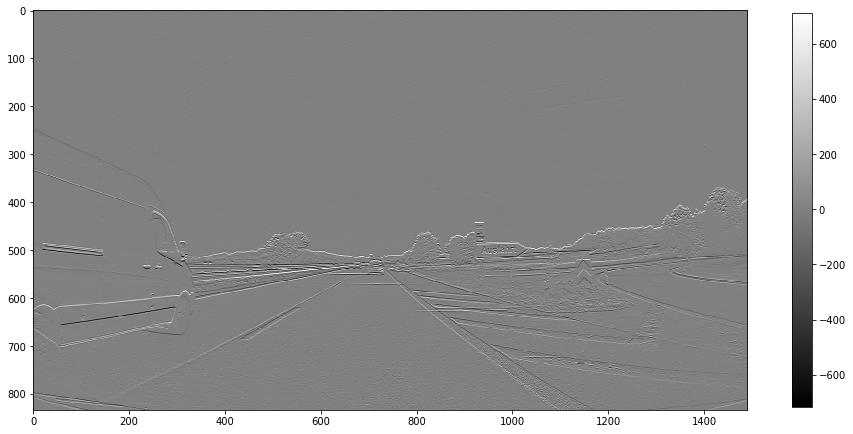

In [27]:
pixel_size_in_inch = 0.02
fig_height_inch = int(R.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R, cmap="gray")
plt.colorbar(shrink=.25)

List of `imshow()` colormaps: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

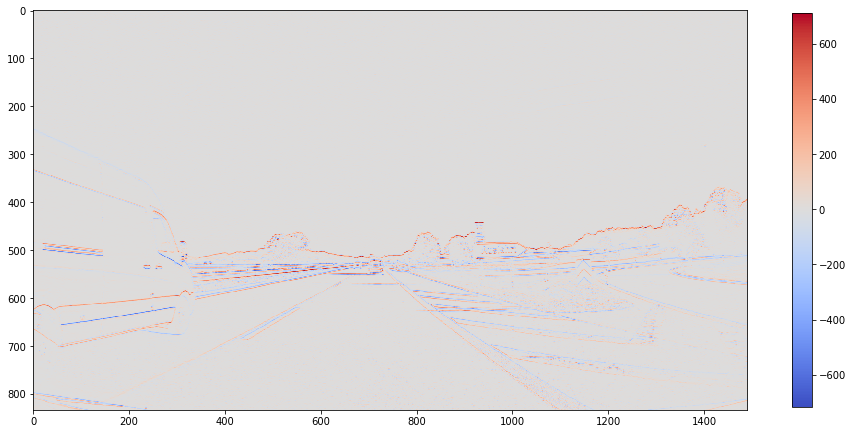

In [28]:
pixel_size_in_inch = 0.02
fig_height_inch = int(R.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R, cmap="coolwarm")
plt.colorbar(shrink=.25)

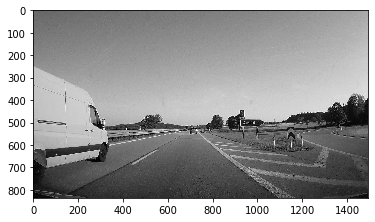

In [29]:
plt.imshow(img_gray, cmap="gray")

# Display only magnitude of the filter response values

In [30]:
R_mag = abs(R) / (3*255.0)

In [31]:
R_mag.shape

(834, 1491)

In [32]:
R_mag.min()

0.0

In [33]:
R_mag.max()

0.9372549019607843

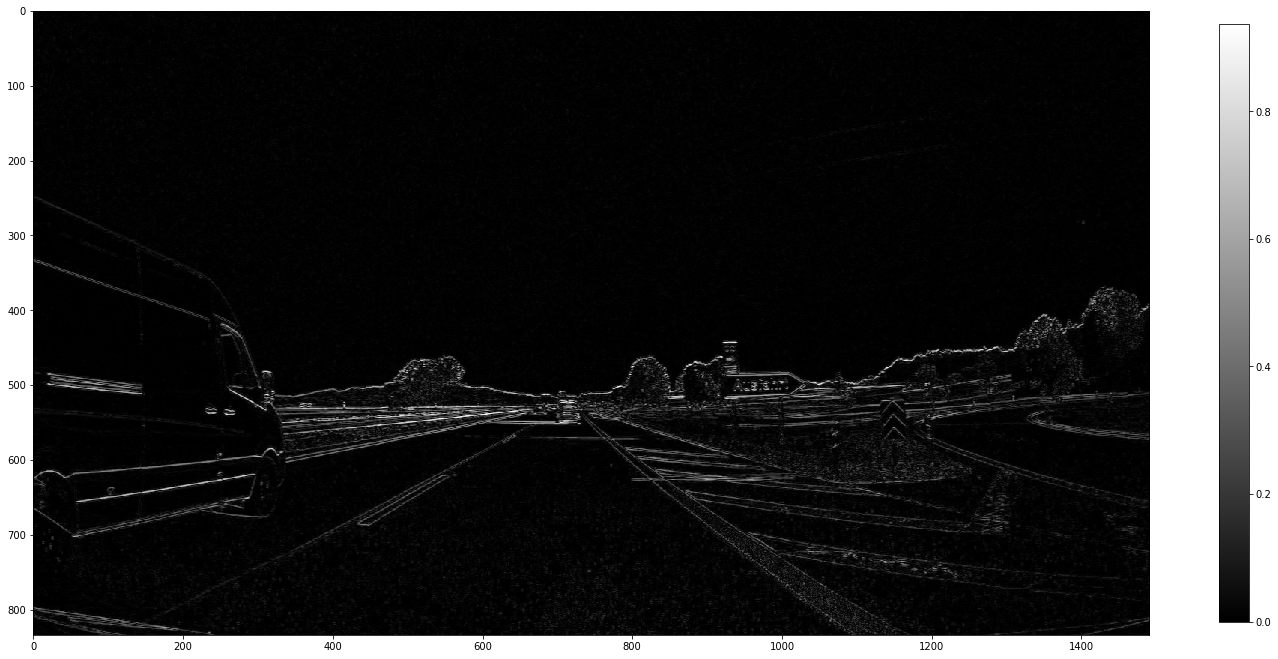

In [34]:
pixel_size_in_inch = 0.03
fig_height_inch = int(R_mag.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R_mag.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R_mag, cmap="gray")
plt.colorbar(shrink=.25)

# Show only strong filter responses

In [38]:
THETA = 0.3
R_strong = R_mag > THETA

In [39]:
type(R_strong)

numpy.ndarray

In [40]:
R_strong.dtype

dtype('bool')

In [41]:
R_strong.shape

(834, 1491)

In [42]:
R_strong

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
R_strong2 = R_strong.astype(np.int)

In [45]:
R_strong2.dtype

dtype('int64')

In [46]:
R_strong2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

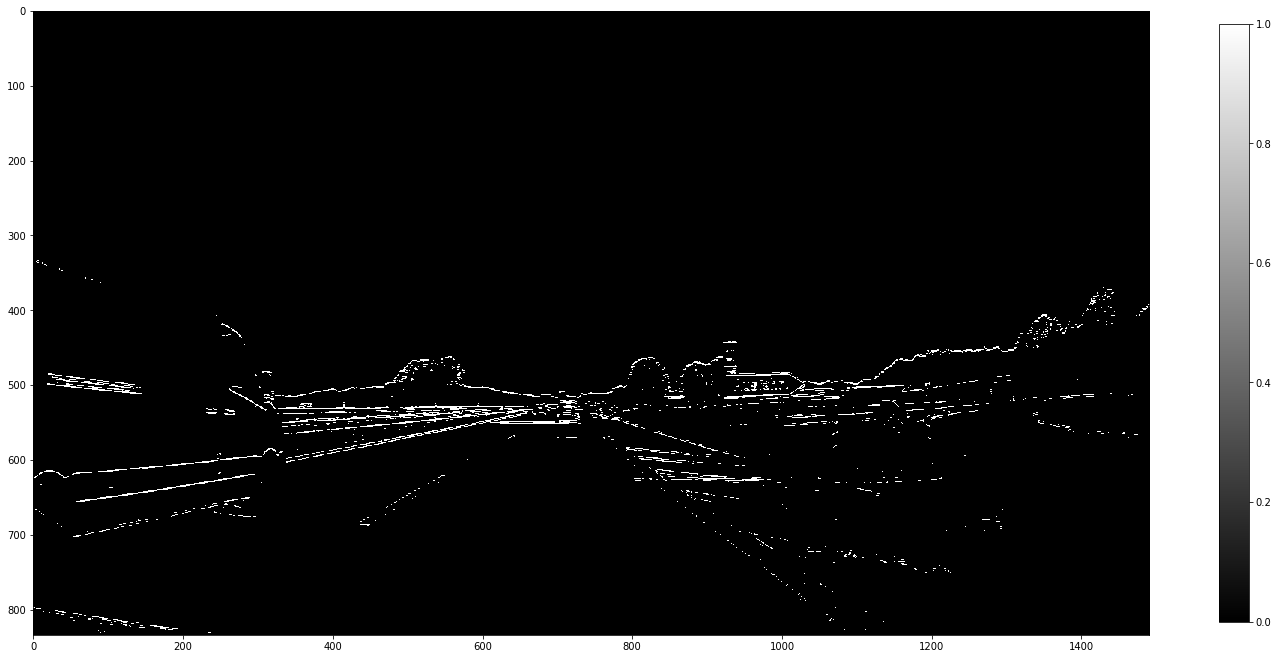

In [47]:
pixel_size_in_inch = 0.03
fig_height_inch = int(R_strong2.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R_strong2.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R_strong2, cmap="gray")
plt.colorbar(shrink=.25)